In [1]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import cifar10
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Завантаження датасету CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
# Нормалізація пікселів зображень до діапазону [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [4]:
# Преобразування меток класів в one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [5]:
# Завантаження попередньо навченого VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step


In [6]:
# Замороження шарів базової моделі
for layer in base_model.layers:
    layer.trainable = False

In [7]:
# Додавання нових шарів
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [8]:
# Компіляція моделі
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:

# Виведення архітектури моделі
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 1, 1, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,781,642 (56.39 MB)

 Trainable params: 66,954 (261.54 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [10]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [11]:
# Колбеки
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

In [12]:
# Навчання моделі
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=64, callbacks=[early_stopping, reduce_lr])

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 280s 356ms/step - accuracy: 0.3649 - loss: 1.7882 - val_accuracy: 0.5350 - val_loss: 1.3216 - learning_rate: 0.0010
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 416s 532ms/step - accuracy: 0.5133 - loss: 1.3853 - val_accuracy: 0.5645 - val_loss: 1.2479 - learning_rate: 0.0010
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 349s 446ms/step - accuracy: 0.5462 - loss: 1.3047 - val_accuracy: 0.5730 - val_loss: 1.2234 - learning_rate: 0.0010
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 319s 408ms/step - accuracy: 0.5607 - loss: 1.2627 - val_accuracy: 0.5762 - val_loss: 1.2012 - learning_rate: 0.0010
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 351s 449ms/step - accuracy: 0.5702 - loss: 1.2306 - val_accuracy: 0.5865 - val_loss: 1.1810 - learning_rate: 0.0010
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 360s 460ms/step - accuracy: 0.5741 - loss: 1.2206 - val_accuracy: 0.5886 - val_loss: 1.1705 - learning_rate: 0.0010
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 384s 491ms/step - accura

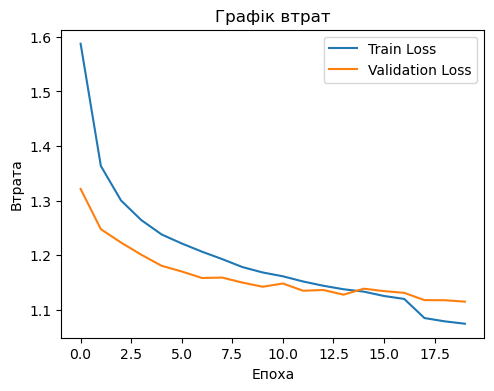

In [13]:
# Графік втрат
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Графік втрат')
plt.xlabel('Епоха')
plt.ylabel('Втрата')
plt.legend()

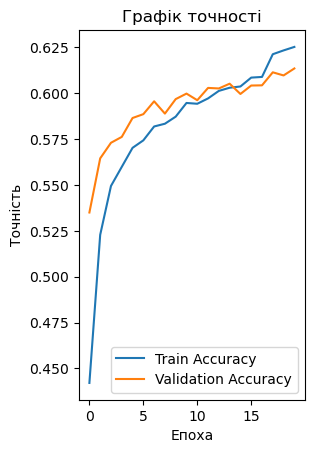

In [14]:
# Графік точності
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Графік точності')
plt.xlabel('Епоха')
plt.ylabel('Точність')
plt.legend()

plt.show()

In [15]:
from sklearn.metrics import classification_report

# Передбачення класів
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Виведення класифікаційного звіту
print(classification_report(y_true, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 50s 158ms/step
              precision    recall  f1-score   support

           0       0.67      0.70      0.69      1000
           1       0.66      0.68      0.67      1000
           2       0.53      0.52      0.52      1000
           3       0.47      0.41      0.43      1000
           4       0.58      0.54      0.56      1000
           5       0.59      0.52      0.55      1000
           6       0.64      0.68      0.66      1000
           7       0.66      0.70      0.68      1000
           8       0.69      0.74      0.72      1000
           9       0.61      0.65      0.63      1000

    accuracy                           0.61     10000
   macro avg       0.61      0.61      0.61     10000
weighted avg       0.61      0.61      0.61     10000



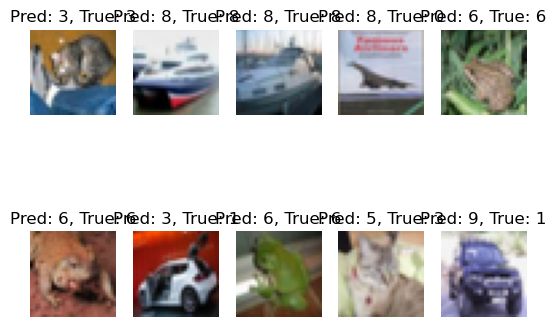

In [16]:
# Візуалізація передбачень для перших 10 зображень з тестового набору
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i])
    plt.title(f"Pred: {y_pred_classes[i]}, True: {y_true[i]}")
    plt.axis('off')
plt.show()